## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
studyCombined = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
studyCombined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
studyCombinedCt = len(studyCombined['Mouse ID'].unique())
studyCombinedCt

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
studyCombinedDup = studyCombined[studyCombined.duplicated(subset = ['Mouse ID', 'Timepoint'])]
studyCombinedDup["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
studyCombined.loc[studyCombined['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicated mouse ID without duplicates
studyCombinedDup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
studyCombinedClean = studyCombined.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
studyCombinedClean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
studyCombinedCleanCt = len(studyCombinedClean['Mouse ID'].unique())
studyCombinedCleanCt

249

In [8]:
studyCombinedClean["Mouse ID"].value_counts()

m957    10
s185    10
q511    10
s337    10
h246    10
        ..
x336     1
t573     1
x226     1
h428     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

studySummary = studyCombinedClean.copy()

studyTVMean = studySummary.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'].round(2)
studyTVMedian = studySummary.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'].round(2)
studyTVVariance = studySummary.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'].round(2)
studyTVSD = studySummary.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'].round(2)
studyTVSEM = studySummary.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'].round(2)

studySummary = studySummary.drop_duplicates(['Drug Regimen']).set_index(['Drug Regimen']).sort_index()
studySummary['Tumor Volume Mean'] = studyTVMean
studySummary['Tumor Volume Median'] = studyTVMedian
studySummary['Tumor Volume Variance'] = studyTVVariance
studySummary['Tumor Volume Standard Dev'] = studyTVSD
studySummary['Tumor Volume SEM'] = studyTVSEM

studySummary

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Dev,Tumor Volume SEM
Drug Regimen,,,,,,,,,,,,
Capomulin,s185,Female,3,17,0,45.0,0,40.68,41.56,24.95,4.99,0.33
Ceftamin,a275,Female,20,28,0,45.0,0,52.59,51.78,39.29,6.27,0.47
Infubinol,a203,Female,20,23,0,45.0,0,52.88,51.82,43.13,6.57,0.49
Ketapril,a457,Female,11,30,0,45.0,0,55.24,53.70,68.55,8.28,0.60
Naftisol,a818,Female,12,28,0,45.0,0,54.33,52.51,66.17,8.13,0.60
Placebo,a262,Female,17,29,0,45.0,0,54.03,52.29,61.17,7.82,0.58
Propriva,a699,Female,5,28,0,45.0,0,52.38,50.78,43.22,6.57,0.53
Ramicane,k403,Male,21,16,0,45.0,0,40.22,40.67,23.49,4.85,0.32
Stelasyn,a366,Female,16,29,0,45.0,0,54.23,52.43,59.45,7.71,0.57


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
studySummaryStats = studySummary[['Tumor Volume Mean', 'Tumor Volume Median', 'Tumor Volume Variance',
                                           'Tumor Volume Standard Dev', 'Tumor Volume SEM']]
studySummaryStats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [11]:
# Using the aggregation method, produce the same summary statistics in a single line
studySumAgg = studyCombinedClean.copy()

studySumAgg = studySumAgg.sort_index().groupby('Drug Regimen')
studySumAgg = studySumAgg['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).round(2)
studySumAgg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

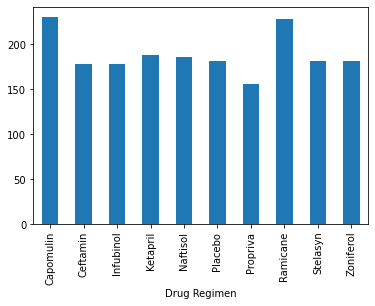

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
studyBar = studyCombinedClean.copy()

studyBar = studyBar.set_index('Drug Regimen').sort_index().groupby(['Drug Regimen']).count()
studyBar['Timepoint'].plot(kind = 'bar')


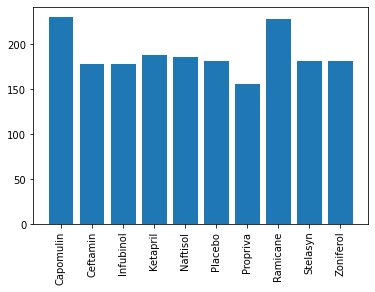

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure()
studyBarPy = studyCombinedClean.copy().set_index('Drug Regimen').sort_index().groupby(['Drug Regimen'])['Timepoint'].count()
plt.bar(studyBarPy.index, studyBarPy.values)
plt.xticks(rotation = 90, horizontalalignment = 'center')
plt.show()


<AxesSubplot:ylabel='Mouse ID'>

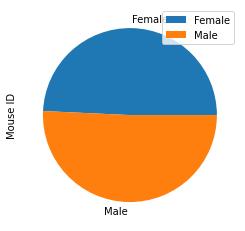

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
studyPie = studyCombinedClean.copy().set_index('Sex').sort_index().groupby(['Sex']).count()
studyPie.plot(kind = 'pie', y = 'Mouse ID')


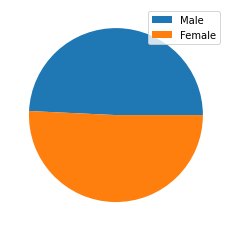

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure()
plt.pie(studyPie['Mouse ID'])
plt.legend(['Male', 'Female'])
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
studyTreatment = studyCombinedClean.copy().set_index('Drug Regimen').sort_index().loc[
    ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin' ]]
studyTreatment


# Start by getting the last (greatest) timepoint for each mouse
grTimepoint = studyTreatment.groupby(['Mouse ID', 'Drug Regimen'])[['Timepoint']].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
studyFinTreatment = pd.merge(grTimepoint, studyCombinedClean[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']],
                        on = ['Mouse ID', 'Drug Regimen', 'Timepoint']).set_index('Mouse ID')
studyFinTreatment

,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
a203,Infubinol,45,67.973419
a251,Infubinol,45,65.525743
a275,Ceftamin,45,62.999356
a411,Ramicane,45,38.407618
a444,Ramicane,45,43.047543
...,...,...,...
y769,Ceftamin,45,68.594745
y793,Capomulin,45,31.896238
y865,Ceftamin,45,64.729837


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
filRegimen = studyFinTreatment['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumorVol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in filRegimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    filtered_df = studyFinTreatment[studyFinTreatment['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    tumorVol.append(filtered_df)
    
    # add subset 
    quartiles = filtered_df.quantile([.25, .5, .75])
    lowQ = quartiles[.25]
    highQ = quartiles[.75]
    iqr = highQ - lowQ
    
    
    # Determine outliers using upper and lower bounds
    lowBound = lowQ - (1.5 * iqr)
    highBound = highQ + (1.5 * iqr)
    
    print(f'{regimen}\n\nQuartiles:\n{quartiles}\n\nIQR = {iqr}\nLow Outliers = {lowBound}, High Outliers = {highBound}\n')
    

Infubinol

Quartiles:
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64

IQR = 11.477135160000003
Low Outliers = 36.83290494999999, High Outliers = 82.74144559000001

Ceftamin

Quartiles:
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64

IQR = 15.577752179999997
Low Outliers = 25.355449580000002, High Outliers = 87.66645829999999

Ramicane

Quartiles:
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64

IQR = 9.098536719999998
Low Outliers = 17.912664470000003, High Outliers = 54.30681135

Capomulin

Quartiles:
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64

IQR = 7.781863460000004
Low Outliers = 20.70456164999999, High Outliers = 51.83201549



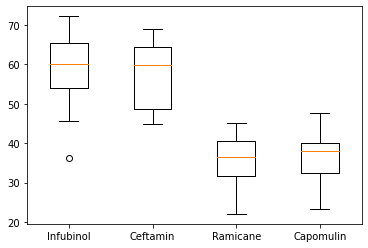

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.boxplot(tumorVol)
plt.xticks([1, 2, 3, 4], filRegimen)
plt.show()

## Line and Scatter Plots

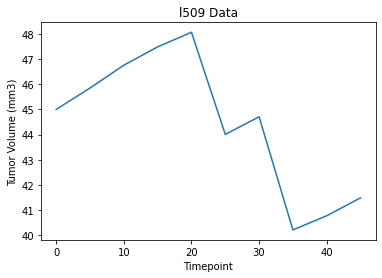

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
l509,Capomulin,Male,17,21,0,45.000000,0
l509,Capomulin,Male,17,21,5,45.851193,0
l509,Capomulin,Male,17,21,10,46.759074,0
l509,Capomulin,Male,17,21,15,47.488599,1
l509,Capomulin,Male,17,21,20,48.070452,2
l509,Capomulin,Male,17,21,25,44.006257,2
l509,Capomulin,Male,17,21,30,44.708055,2
l509,Capomulin,Male,17,21,35,40.207288,2
l509,Capomulin,Male,17,21,40,40.770813,2


In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capFil = studyCombinedClean.loc[studyCombinedClean['Drug Regimen'] == 'Capomulin']
ranMouseID = capFil.set_index(['Mouse ID']).sample().index[0]
capFiltered = studyCombinedClean.set_index(['Mouse ID']).loc[[ranMouseID]]

capFilTV = capFiltered['Tumor Volume (mm3)']
capFilTP = capFiltered['Timepoint']

plt.title(f'{ranMouseID} Data')
plt.plot(capFilTP, capFilTV)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
capFiltered

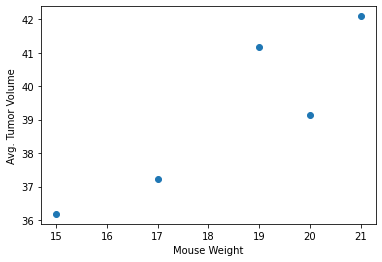

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700


In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capAvg = capFil.groupby(['Weight (g)']).mean().head().reset_index()
mouseWeight = capAvg['Weight (g)']
avgTV = capAvg['Tumor Volume (mm3)']

plt.scatter(mouseWeight, avgTV)
plt.xlabel('Mouse Weight')
plt.ylabel('Avg. Tumor Volume')
plt.show()
capAvg[['Weight (g)', 'Tumor Volume (mm3)']]

## Correlation and Regression

The correlation coefficient between Mouse Weight and Average Tumor Volume for Capomulin is 0.89


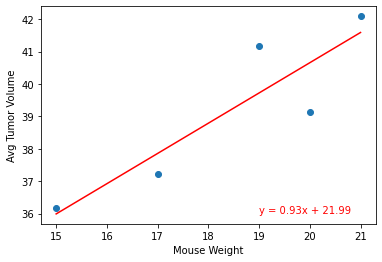

The r-squared is: 0.8


In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capAvgTV = capAvg[['Weight (g)', 'Tumor Volume (mm3)']].copy()

capCorrelation = round(st.pearsonr(mouseWeight, avgTV)[0],2)
print(f'The correlation coefficient between Mouse Weight and Average Tumor Volume for Capomulin is {capCorrelation}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouseWeight, avgTV)
regressed = mouseWeight * slope + intercept
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mouseWeight,avgTV)
plt.plot(mouseWeight,regressed,'r-')
plt.annotate(eq, (19, 36), color = 'red')
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Volume')
plt.show()
print(f"The r-squared is: {round(rvalue**2, 2)}")